Scraping PV data
----------
In this file, I am scraping the link http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/ from the data it has.

upon inspection, it contains nested zips that contains more dates to the same zips. (example: file `PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223` outputs one CSV when exported manually but outputs 112 zips when extracted programmatically (command line or python)

The steps are as follows:
- I get the zip urls from the website and store them in a list
- iterate over the list and download them into a folder 
-[ TODO ] iterate over the zips in `unzipped_files` and export them to CSVs
- read the CSVs in pandas and cocat into the same dataframe

# Get ZIP URLS

In [ ]:
import requests
from bs4 import BeautifulSoup
# from urllib.parse import urlparse


# The URL of the page you want to scrape
url = "http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/"
base_url= "http://nemweb.com.au"
# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content of the page
    soup = BeautifulSoup(response.text, 'html.parser')
    zip_urls=[]
    # Find all <a> tags
    links = soup.find_all('a')
    
    
    # Filter out links and print them
    for link in links:
        href = link.get('href')
#         print(base_url)
        if href and href.endswith('.zip'):  # Check if the link ends with .zip
            full_url = base_url + href if not href.startswith('http') else href
#             print(href)
#             print(full_url)
            zip_urls.append(full_url)
else:
    print(f"Failed to retrieve content from {url}, status code: {response.status_code}")


In [3]:
zip_urls

['http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230302.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230309.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230316.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230323.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230330.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230406.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230413.zip',
 'http://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230420.zip',
 'http://nemweb.com

# checking the span of the data

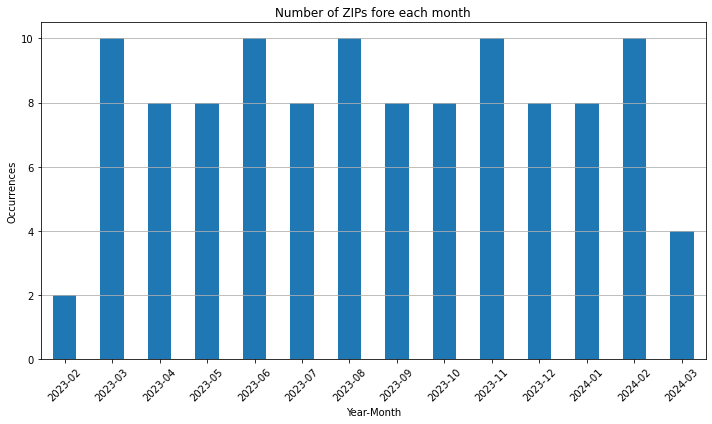

In [18]:
from datetime import datetime
dates=[]
for url in zip_urls:
    
    date_string = url.split("_")[-1].split(".")[0]
    date_object = datetime.strptime(date_string, "%Y%m%d")
    dates.append(date_object)
    
#dates

import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame from the datetime objects
df = pd.DataFrame(dates, columns=['Date'])

# Extract year and month into a new column
df['YearMonth'] = df['Date'].dt.to_period('M')

# Count the occurrences of each year-month
counts = df['YearMonth'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
counts.plot(kind='bar')
plt.title('Number of ZIPs fore each month')
plt.xlabel('Year-Month')
plt.ylabel('Occurrences')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Download the zips

In [ ]:
import requests
import os

# Define the folder name where files will be saved
folder_name = 'zips'

# Check if the folder exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

for file_url in zip_urls:
    print(file_url)
    response = requests.get(file_url)
    filename = file_url.split('/')[-1]  # Extracts the filename

    # Modify the path to save the file in the new folder
    file_path = os.path.join(folder_name, filename)

    # Save the file in the specified folder
    with open(file_path, 'wb') as file:
        file.write(response.content)

    print(f"Downloaded {filename} into {folder_name}")


# Unzip 1

In [ ]:
import os
import zipfile

# Define the source and destination folder paths
source_folder = 'zips'
destination_folder = 'unzipped_files'

# Check if the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# List all the files in the source folder
for filename in os.listdir(source_folder):
    # Construct the full file path
    file_path = os.path.join(source_folder, filename)
    
    # Check if the file is a ZIP file
    if zipfile.is_zipfile(file_path):
        print(f"Unzipping {filename}")
        
        # Open the ZIP file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all the contents into the destination folder
            zip_ref.extractall(destination_folder)
        
        print(f"Extracted {filename} into {destination_folder}")
    else:
        print(f"{filename} is not a zip file. Skipping.")

print("Unzipping complete.")

# the unzip process isn't working as expected, we have encapsulated zip' files, so I need to do this again

## Sanity checks with the command line

In [ ]:
# using my trusty command line
#!unzip -o "zips/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223.zip" -d "zips/unzipped/"
# !unzip -o 'zips/unzipped/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223000000_0000000381390815.zip' -d "zips/unzipped/"
!unzip -o 'zips/unzipped/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223003000_0000000381392042.zip' -d "zips/unzipped/"


In [ ]:
# test zip file
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_path = 'zips/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223.zip'
extraction_path = 'zips/unzipped'  # Directory where files will be extracted

# Ensure the extraction directory exists
if not os.path.exists(extraction_path):
    os.makedirs(extraction_path)

# Open the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    # Extract all the contents into the directory
    zip_ref.extractall(extraction_path)
    print(f"Contents of the ZIP file extracted to {extraction_path}")

# List the contents of the extraction directory
extracted_files = os.listdir(extraction_path)
print("Extracted files:")
for file in extracted_files:
    print(file)

# If you expect only one CSV and it's directly in the ZIP, let's find it
csv_files = [file for file in extracted_files if file.endswith('.csv')]
if csv_files:
    print("CSV files found:")
    for csv_file in csv_files:
        print(csv_file)
else:
    print("No CSV files found directly in the ZIP file.")

# unzip round 2
Extracts a total of 37k csvs

In [ ]:
import os
import zipfile

# Define the source and destination folder paths
source_folder = 'unzipped_files'
destination_folder = 'unzipped_files_round2'

# Check if the destination folder exists, if not, create it
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

i=0
# List all the files in the source folder
for filename in os.listdir(source_folder):
    # Construct the full file path
    file_path = os.path.join(source_folder, filename)
    
    # Check if the file is a ZIP file
    if zipfile.is_zipfile(file_path):
#         print(f"Unzipping {filename}")
        
        # Open the ZIP file
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            # Extract all the contents into the destination folder
            zip_ref.extractall(destination_folder)
        
        print(f"Extracted {filename} into {destination_folder}")
        i+=1
        if (i%1000==0): # I tried it for the first 100 zips in the second directory and seems to be working
            print('extracted ', i, " Csvs")
    else:
        print(f"{filename} is not a zip file. Skipping.")

print("Unzipping complete.")



# Read as pandas and concat

In [19]:
import pandas as pd
import os

# Specify the directory where your CSV files are located
directory = 'unzipped_files_round2'

# List to hold your DataFrames
dataframes_list = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(directory, filename)  # Get the full path to the file
        df = pd.read_csv(file_path, header=None)  # Read the CSV file into a DataFrame
        dataframes_list.append(df)  # Append the DataFrame to the list




In [20]:
print (len(dataframes_list))
dataframes_list[0].head()

37269


,0,1,2,3,4,5,6,7,8,9
0,C,NEMP.WORLD,ROOFTOP_PV_ACTUAL_MEASUREMENT,AEMO,PUBLIC,2023/03/23,06:00:02,0000000383340378,DEMAND,0000000383340378
1,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
2,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,NSW1,0,1,MEASUREMENT,2023/03/23 05:49:23
3,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLD1,0,1,MEASUREMENT,2023/03/23 05:49:23
4,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLDC,0,1,MEASUREMENT,2023/03/23 05:49:23


In [21]:
dataframes_list[1].head()

,0,1,2,3,4,5,6,7,8,9
0,C,NEMP.WORLD,ROOFTOP_PV_ACTUAL_SATELLITE,AEMO,PUBLIC,2023/12/15,14:00:01,0000000405682587,DEMAND,0000000405682586
1,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
2,D,ROOFTOP,ACTUAL,2,2023/12/15 13:30:00,NSW1,4236.606,0.6,SATELLITE,2023/12/15 13:50:27
3,D,ROOFTOP,ACTUAL,2,2023/12/15 13:30:00,QLD1,3021.695,0.6,SATELLITE,2023/12/15 13:50:27
4,D,ROOFTOP,ACTUAL,2,2023/12/15 13:30:00,QLDC,350.216,0.6,SATELLITE,2023/12/15 13:50:27


According to the user manual (https://nemweb.com.au/Data_Archive/Wholesale_Electricity/MMSDM/2022/MMSDM_2022_10/MMSDM_Historical_Data_SQLLoader/DOCUMENTATION/Participant_Monthly_DVD.pdf) the line marked by C in column 0 is the header column. let's see how to set it as header

In [23]:
# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(dataframes_list, ignore_index=True)

# Now you have a single DataFrame 'combined_df' containing all the data
print(combined_df.shape)

(484497, 10)


All the rows with colum0=I are the same, so I can us them as a heading, and all the data is marked by "D"

In [32]:
headings_df=combined_df[combined_df[0]=="I"].drop_duplicates() 

## Creating the raw data dataframe

In [35]:
pv_data=combined_df[combined_df[0]=="D"].reset_index(drop=True)

In [45]:
heading_list=headings_df.values.tolist()
heading_list=heading_list[0]
pv_data.columns = heading_list
pv_data

,I,ROOFTOP,ACTUAL,2,INTERVAL_DATETIME,REGIONID,POWER,QI,TYPE,LASTCHANGED
0,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,NSW1,0,1,MEASUREMENT,2023/03/23 05:49:23
1,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLD1,0,1,MEASUREMENT,2023/03/23 05:49:23
2,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLDC,0,1,MEASUREMENT,2023/03/23 05:49:23
3,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLDN,0,1,MEASUREMENT,2023/03/23 05:49:23
4,D,ROOFTOP,ACTUAL,2,2023/03/23 05:30:00,QLDS,0,1,MEASUREMENT,2023/03/23 05:49:23
...,...,...,...,...,...,...,...,...,...,...
372685,D,ROOFTOP,ACTUAL,2,2023/06/30 23:00:00,SA1,0,1,MEASUREMENT,2023/06/30 23:19:16
372686,D,ROOFTOP,ACTUAL,2,2023/06/30 23:00:00,TAS1,0,1,MEASUREMENT,2023/06/30 23:19:16
372687,D,ROOFTOP,ACTUAL,2,2023/06/30 23:00:00,TASN,0,1,MEASUREMENT,2023/06/30 23:19:16
372688,D,ROOFTOP,ACTUAL,2,2023/06/30 23:00:00,TASS,0,1,MEASUREMENT,2023/06/30 23:19:16


In [47]:
import os
os.mkdir("raw_data")

In [49]:
pv_data.to_csv("raw_data/PV-archive (Feb 23 to Mar 24).csv", index=False)

combined_dfx: debugging to get the zips downloaded correctly

In [ ]:
# interlude: 2 hours of debugging to get the links right

# import requests
# import os
# import hashlib

# def verify_file_checksum(file_path, original_checksum):
#     """Verify file checksum."""
#     sha256_hash = hashlib.sha256()
#     with open(file_path, "rb") as f:
#         # Read and update hash in chunks of 4K
#         for byte_block in iter(lambda: f.read(4096), b""):
#             sha256_hash.update(byte_block)
#     return sha256_hash.hexdigest() == original_checksum

# # Define the folder name where files will be saved
# folder_name = 'zips'

# # Check if the folder exists, if not, create it
# if not os.path.exists(folder_name):
#     os.makedirs(folder_name)

# for file_url in zip_urls:
#     print(file_url)
#     response = requests.get(file_url, stream=True)  # Stream the download

#     if response.status_code == 200:
#         filename = file_url.split('/')[-1]  # Extracts the filename
#         file_path = os.path.join(folder_name, filename)

#         # Save the file in the specified folder
#         with open(file_path, 'wb') as file:
#             for chunk in response.iter_content(chunk_size=8192):
#                 file.write(chunk)

#         print(f"Downloaded {filename} into {folder_name}")

#         # Example checksum verification (assuming you have the original checksum)
#         # original_checksum = 'the_checksum_provided_for_the_file'
#         # if verify_file_checksum(file_path, original_checksum):
#         #     print(f"Checksum verified for {filename}")
#         # else:
#         #     print(f"Checksum mismatch for {filename}")
#     else:
#         print(f"Failed to download {filename}. Status code: {response.status_code}")

        
# import requests

# def download_file(url, filename):
#     """
#     Download a file from a URL and save it to the local filesystem.

#     Parameters:
#     - url: The URL of the file to download.
#     - filename: The local filename to save the downloaded file.
#     """
#     # Send a GET request to the URL
#     response = requests.get(url)
    
#     # Check if the request was successful
#     if response.status_code == 200:
#         # Open a local file with write-binary ('wb') mode
#         with open(filename, 'wb') as f:
#             f.write(response.content)
#         print(f"File downloaded successfully: {filename}")
#     else:
#         print(f"Failed to download file. HTTP Status Code: {response.status_code}")

# # Example usage
# url = zip_urls[0]
# filename = 'local_filename.zip'
# download_file(url, filename)

In [ ]:
url

In [ ]:
https://nemweb.com.au/Reports/Archive/ROOFTOP_PV/ACTUAL/PUBLIC_ROOFTOP_PV_ACTUAL_MEASUREMENT_20230223.zip